In [2]:
import yfinance as yf 
import pandas as pd
import os

### 1. Downloading the data

In [3]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")   # initializing a ticker class which will enable us to download price history for a single symbol 
    sp500 = sp500.history(period="max")    # we query the historical prices
    sp500.to_csv("sp500.csv")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-09 00:00:00-04:00,4289.020020,4341.729980,4283.790039,4335.660156,3174630000,0.0,0.0
2023-10-10 00:00:00-04:00,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,0.0,0.0
2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,0.0,0.0


In [5]:
sp500.head(10).index

Index(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
       '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
       '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
       '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
       '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00'],
      dtype='object', name='Date')

### 2. Cleaning and Visualizing the data

<Axes: xlabel='Date'>

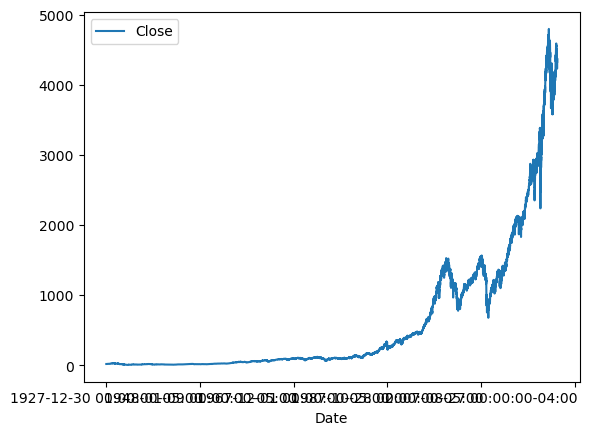

In [6]:
sp500.plot.line(y="Close",use_index=True)

In [7]:
del sp500["Dividends"]
del sp500["Stock Splits"]
sp500.head()
# these are more appropriate for individual stocks not for index

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


### 3. Setting up our target for ML

In [8]:
sp500["Tomorrow"]=sp500["Close"].shift(-1)
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2023-10-09 00:00:00-04:00,4289.020020,4341.729980,4283.790039,4335.660156,3174630000,4358.240234
2023-10-10 00:00:00-04:00,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195
2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863


In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-10-09 00:00:00-04:00,4289.020020,4341.729980,4283.790039,4335.660156,3174630000,4358.240234,1
2023-10-10 00:00:00-04:00,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195,1
2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863,0


In [10]:
sp500 = sp500.loc["1990-01-01":].copy()     # going back too far in the historical data migt not be useful for future predictions so we are considering from 1990 itself 
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-10-09 00:00:00-04:00,4289.020020,4341.729980,4283.790039,4335.660156,3174630000,4358.240234,1
2023-10-10 00:00:00-04:00,4339.750000,4385.459961,4339.640137,4358.240234,3520240000,4376.950195,1
2023-10-11 00:00:00-04:00,4366.589844,4378.640137,4345.339844,4376.950195,3601660000,4349.609863,0


### 4. Training an initial ML model

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]
predictors = ["Close","Open","Volume","High","Low"]

# splitting the data into training and test data

x_train=train[predictors]
y_train=train["Target"]
x_test= test[predictors]
y_test= test["Target"]

model.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [12]:
from sklearn.metrics import precision_score
y_preds=model.predict(x_test)

In [13]:
y_preds = pd.Series(y_preds, index=test.index)
y_preds

Date
2023-05-23 00:00:00-04:00    0
2023-05-24 00:00:00-04:00    1
2023-05-25 00:00:00-04:00    0
2023-05-26 00:00:00-04:00    0
2023-05-30 00:00:00-04:00    0
                            ..
2023-10-09 00:00:00-04:00    0
2023-10-10 00:00:00-04:00    1
2023-10-11 00:00:00-04:00    1
2023-10-12 00:00:00-04:00    1
2023-10-13 00:00:00-04:00    0
Length: 100, dtype: int32

In [14]:
precision_score(y_test, y_preds)

0.5217391304347826

In [15]:
combined = pd.concat([y_test, y_preds], axis=1)
combined

,Target,0
Date,,
2023-05-23 00:00:00-04:00,0,0
2023-05-24 00:00:00-04:00,1,1
2023-05-25 00:00:00-04:00,1,0
2023-05-26 00:00:00-04:00,1,0
2023-05-30 00:00:00-04:00,0,0
...,...,...
2023-10-09 00:00:00-04:00,1,0
2023-10-10 00:00:00-04:00,1,1
2023-10-11 00:00:00-04:00,0,1


<Axes: xlabel='Date'>

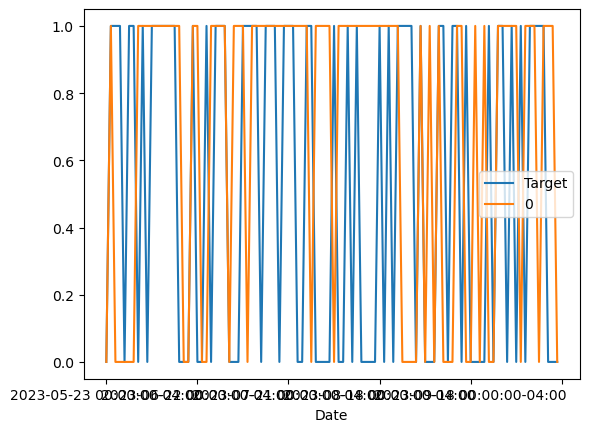

In [16]:
combined.plot()  # the orange line represnts our predictions and blue line represents the actual values

### Building a backtesting system

In [17]:
# we are just wrapping up what all we did so far into one function 
def predict(train,test, predictors,model):
    x_train= train[predictors]
    y_train= train["Target"]
    x_test= test[predictors]
    y_test= test["Target"]
    model.fit(x_train,y_train)
    y_preds= model.predict(x_test)
    y_preds= pd.Series(y_preds, index=test.index, name="Predictions")
    combined= pd.concat([y_test,y_preds],axis=1)
    return combined

In [18]:
# we are going to use the first 10 years of data to predict for the 11th year and use the 11yrs of data to predict for the 12th yr and so on...
# each yr will have 250 business days so 10*250
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions=[]
    for i in range(start,data.shape[0],step):
        # training data is the all of the years prior to the current year
        # test data is the current year
        train= data.iloc[0:i].copy()  # using the copy function to avoid the warning
        test= data.iloc[i:(i+step)].copy() 
        predictions=predict(train,test,predictors,model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)  # concat combines multiple dataframes into single dataframe

In [19]:
predictions = backtest(sp500,model,predictors)

In [20]:
predictions["Predictions"].value_counts()

0    3416
1    2596
Name: Predictions, dtype: int64

In [21]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5261941448382126

In [22]:
predictions["Target"].value_counts() / predictions.shape[0]  # percentage of days where the percentage actually went up

1    0.533599
0    0.466401
Name: Target, dtype: float64

### 5. Adding additional predictors to our model

In [23]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500["Target"].shift(1).rolling(horizon).sum()
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
sp500.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
sp500=sp500.dropna()

In [26]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=50,random_state=1)

In [27]:
def predict(train,test, predictors,model):
    x_train= train[predictors]
    y_train= train["Target"]
    x_test= test[predictors]
    y_test= test["Target"]
    model.fit(x_train,y_train)
    y_preds= model.predict_proba(x_test)[:,1] #2nd column 
    y_preds[y_preds >=0.6]=1    # set threshold as 0.6, in general it will be 0.5
    y_preds[y_preds < 0.6]=0
    y_preds= pd.Series(y_preds, index=test.index, name="Predictions")
    combined= pd.concat([y_test,y_preds],axis=1)
    return combined
    

In [28]:
predictions = backtest(sp500,model,new_predictors)

In [29]:
predictions["Predictions"].value_counts()

0.0    4187
1.0     824
Name: Predictions, dtype: int64

In [30]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5703883495145631

In [31]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.543405
0    0.456595
Name: Target, dtype: float64

In [32]:
predictions

,Target,Predictions
Date,,
2003-11-14 00:00:00-05:00,0,0.0
2003-11-17 00:00:00-05:00,0,1.0
2003-11-18 00:00:00-05:00,1,1.0
2003-11-19 00:00:00-05:00,0,0.0
2003-11-20 00:00:00-05:00,1,1.0
...,...,...
2023-10-06 00:00:00-04:00,1,0.0
2023-10-09 00:00:00-04:00,1,0.0
2023-10-10 00:00:00-04:00,1,0.0


## Summary

In [33]:
""" 

1.downloaded some stock data for sp500 index,
2.cleaned and visualized the data,
3.had set the Ml target, 
4.trained the initial model
5.evaluated the error and created a way to backtest and accurately measure the error over long periods of time
6.improved the model by adding some additional predictors 

"""

' \n\n1.downloaded some stock data for sp500 index,\n2.cleaned and visualized the data,\n3.had set the Ml target, \n4.trained the initial model\n5.evaluated the error and created a way to backtest and accurately measure the error over long periods of time\n6.improved the model by adding some additional predictors \n\n'